### Cell 1: **Import Libraries**

- In this cell, we import the necessary libraries for our neural network. We will be using numpy for numerical computations, matplotlib for visualization, and random for generating random numbers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Cell 2: **Define get_data Function**

- In this cell, we define the get_data function which loads the MNIST dataset, converts the pixel values to a range of 0 to 1, and splits the dataset into training and testing sets.

In [2]:
def get_data():
  with np.load('./data/mnist.npz') as f:
    imgs,labels=f['x_train'],f['y_train']
  imgs=imgs.astype('float32')/255 
  imgs=np.reshape(imgs,(imgs.shape[0],imgs.shape[1]*imgs.shape[2]) )
  labels=np.eye(10)[labels]
  return imgs,labels

### Cell 3: **Neural Network Implementation**

- In this cell, we implement the neural network to recognize digits from images. We train the network using the backpropagation algorithm and update the weights and biases to minimize the error between the predicted and actual labels. The code then tests the accuracy of the network on the test dataset and allows the user to input an image to see the predicted digit.

Acc: 84.71%
Acc: 91.12%
Enter a number (0 - 59999): 55


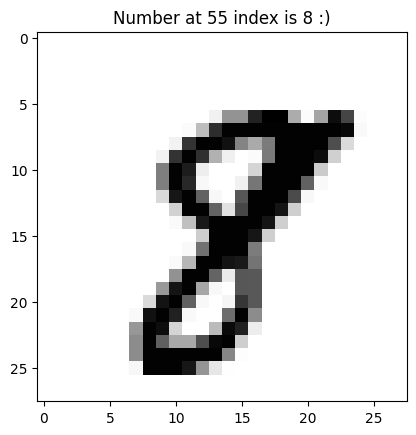

Enter a number (0 - 59999): 94


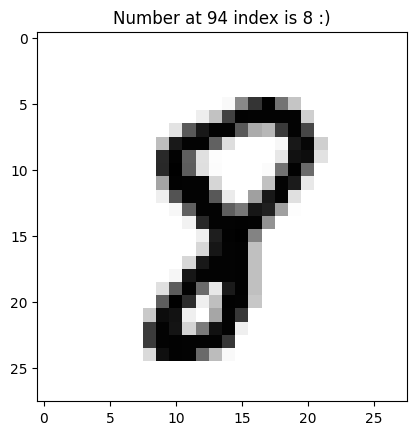

Enter a number (0 - 59999): 35


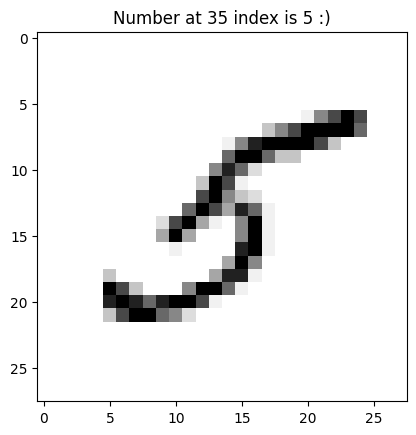

Enter a number (0 - 59999): 452


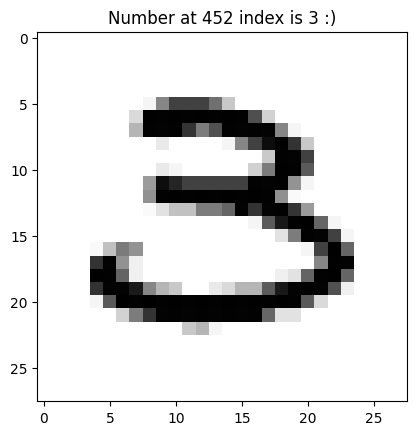

Enter a number (0 - 59999): 865


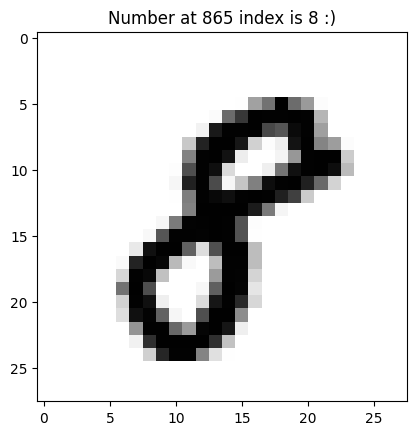

In [3]:
images,labels=get_data()

"""
w = weights, b = bias, i = input, h = hidden, o = output, l = label
"""
def fwd2hidden(img):
  h_pre = np.dot((b_i_h + w_i_h), img)
  return 1 / (1 + np.exp(-h_pre))

def fwd2output(h):  
  o_pre = np.dot((b_h_o + w_h_o),  h)
  return 1 / (1 + np.exp(-o_pre))

def errorCost(o):
    return 1 / len(o) * np.sum((o - l) ** 2, axis=0)


w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_i_h = np.zeros((20, 1))
b_h_o = np.zeros((10, 1))

learn_rate = 0.01 # the step size at which the weights and biases of the neural network are updated during training using the backpropagation algorithm
nr_correct = 0
epochs = 2 # The number of times the entire training dataset will be iterated over during training
for epoch in range(epochs):
    for img, l in zip(images, labels):
        img.shape += (1,)
        l.shape += (1,)
        # Forward propagation input -> hidden layer
        h = fwd2hidden(img)
        # Forward propagation hidden -> output layer
        o = fwd2output(h)
        # Cost / Error calculation
        e = errorCost(o)

        nr_correct += int(np.argmax(o) == np.argmax(l))

        # Backpropagation output -> hidden (cost function derivative)
        delta_o = o - l
        w_h_o += np.dot((-learn_rate * delta_o ), np.transpose(h))
        b_h_o += -learn_rate * delta_o
        
        # Backpropagation hidden -> input (activation function derivative)
        delta_h = np.dot(np.transpose(w_h_o), delta_o) * (h * (1 - h))
        w_i_h += np.dot(-learn_rate * delta_h, np.transpose(img))
        b_i_h += -learn_rate * delta_h

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

# Show results
count=5
try:
  while count>0:
      index = int(input("Enter a number (0 - 59999): "))
      img = images[index]
      plt.imshow(img.reshape(28, 28), cmap="Greys")

      img.shape += (1,)
      # Forward propagation input -> hidden
      h_pre = np.dot((b_i_h + w_i_h), img.reshape(784, 1))
      h = 1 / (1 + np.exp(-h_pre))
      # Forward propagation hidden -> output
      o_pre = np.dot((b_h_o + w_h_o) , h)
      o = 1 / (1 + np.exp(-o_pre))

      plt.title(f"Number at {index} index is {o.argmax()} :)")
      plt.show()
      count-=1
except Exception as e:
  print("Error",e)      